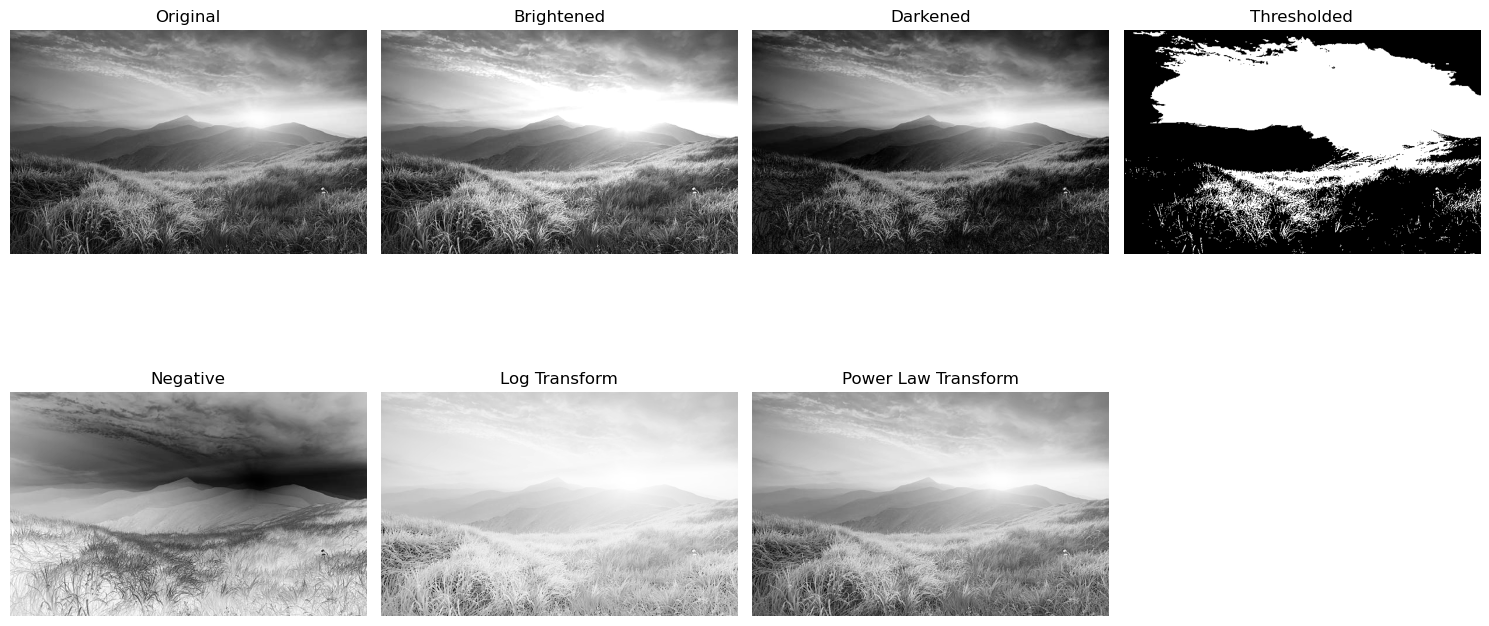

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise SystemExit("Image not found or path is incorrect")

def brighten(image, value=50):
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

def darken(image, value=50):
    return cv2.convertScaleAbs(image, alpha=1, beta=-value)

def threshold(image, thresh_val=128):
    _, thresh_img = cv2.threshold(image, thresh_val, 255, cv2.THRESH_BINARY)
    return thresh_img

def negative(image):
    return cv2.bitwise_not(image)

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(image.astype(np.float32) + 1)
    return cv2.convertScaleAbs(log_image)

def power_law_transform(image, gamma=0.5):
    normalized_img = np.float32(image) / 255.0
    power_img = np.power(normalized_img, gamma)
    return cv2.convertScaleAbs(power_img * 255)

bright_img = brighten(img.copy(), 50)
dark_img = darken(img.copy(), 50)
thresh_img = threshold(img.copy())
negative_img = negative(img.copy())
log_img = log_transform(img.copy())
power_img = power_law_transform(img.copy())

titles = ['Original', 'Brightened', 'Darkened', 'Thresholded', 'Negative', 'Log Transform', 'Power Law Transform']
images = [img, bright_img, dark_img, thresh_img, negative_img, log_img, power_img]

plt.figure(figsize=(15,8))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()